In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
DATA_DIR = "../data"

files = [
    "ant-1.3.csv", "ant-1.4.csv", "ant-1.5.csv", "ant-1.6.csv", "ant-1.7.csv",
    "camel-1.0.csv", "camel-1.2.csv", "camel-1.4.csv", "camel-1.6.csv",
    "ivy-1.4.csv", "ivy-2.0.csv",
    "jedit-3.2.csv", "jedit-4.0.csv", "jedit-4.1.csv", "jedit-4.2.csv"
]

In [3]:
summary = []

datasets = {}

for fname in files:
    df = pd.read_csv(os.path.join(DATA_DIR, fname))

    # bug 이진화
    df["bug_binary"] = (df["bug"] > 0).astype(int)

    datasets[fname] = df

    n_samples = len(df)
    defective = df["bug_binary"].sum()
    defect_ratio = defective / n_samples

    summary.append({
        "dataset": fname,
        "samples": n_samples,
        "defective_modules": defective,
        "non_defective_modules": n_samples - defective,
        "defect_ratio": round(defect_ratio, 3)
    })

summary_df = pd.DataFrame(summary)
summary_df

,dataset,samples,defective_modules,non_defective_modules,defect_ratio
0,ant-1.3.csv,125,20,105,0.160
1,ant-1.4.csv,178,40,138,0.225
2,ant-1.5.csv,293,32,261,0.109
3,ant-1.6.csv,351,92,259,0.262
4,ant-1.7.csv,745,166,579,0.223
5,camel-1.0.csv,339,13,326,0.038
6,camel-1.2.csv,608,216,392,0.355
7,camel-1.4.csv,872,145,727,0.166
8,camel-1.6.csv,965,188,777,0.195
9,ivy-1.4.csv,241,16,225,0.066


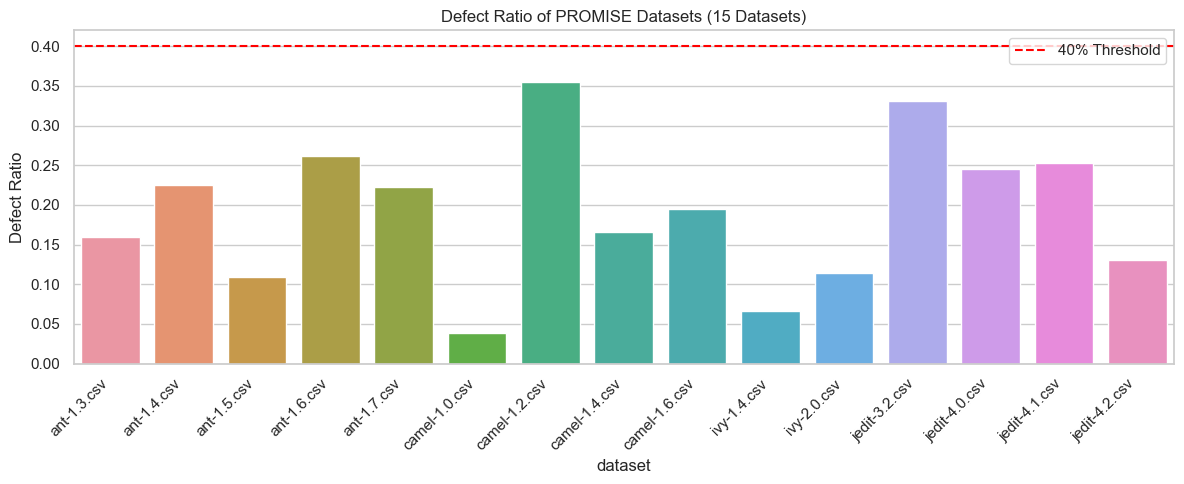

In [4]:
plt.figure(figsize=(12, 5))
sns.barplot(data=summary_df, x="dataset", y="defect_ratio")
plt.axhline(0.4, color="red", linestyle="--", label="40% Threshold")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Defect Ratio")
plt.title("Defect Ratio of PROMISE Datasets (15 Datasets)")
plt.legend()
plt.tight_layout()
plt.show()

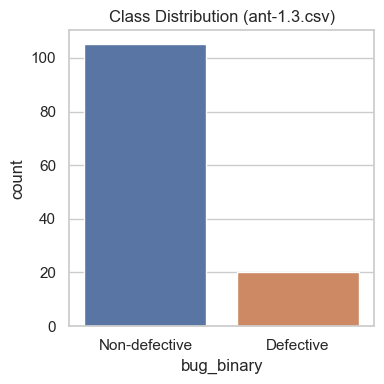

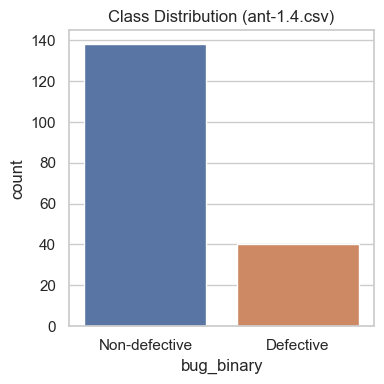

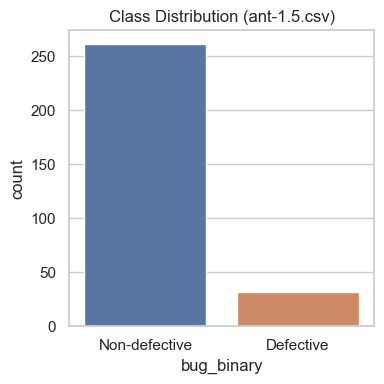

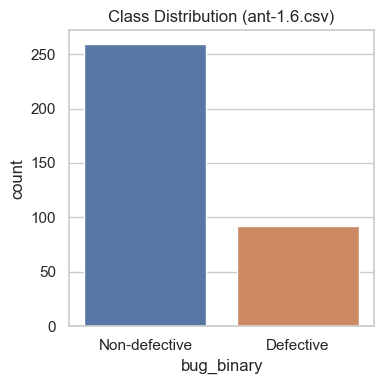

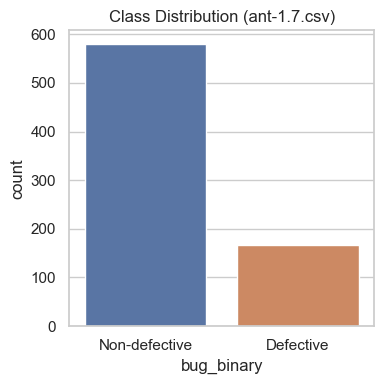

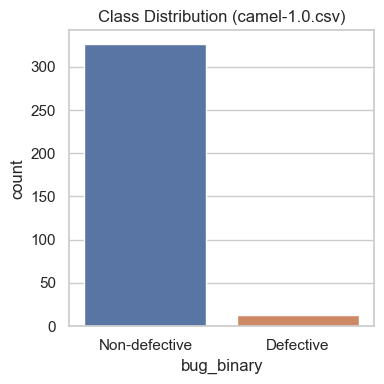

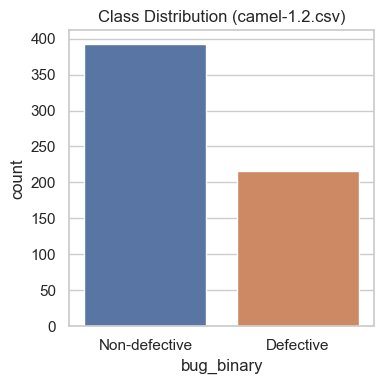

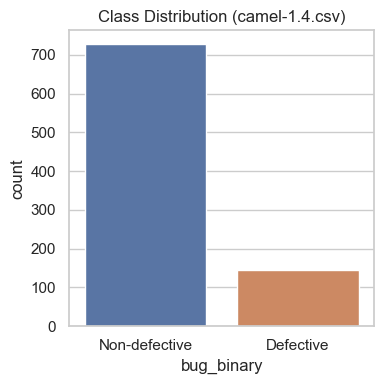

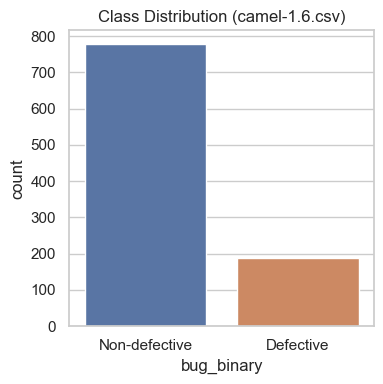

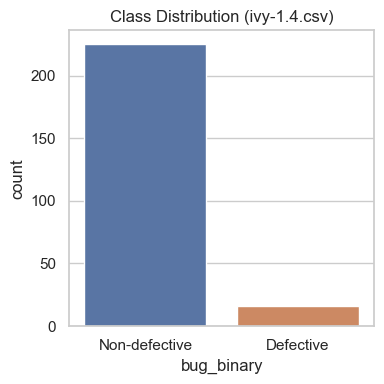

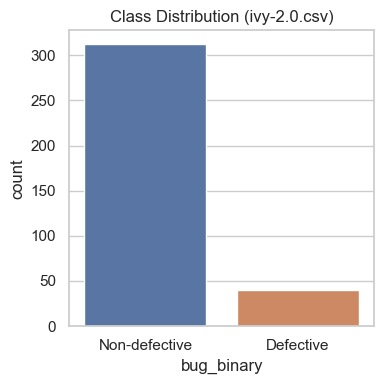

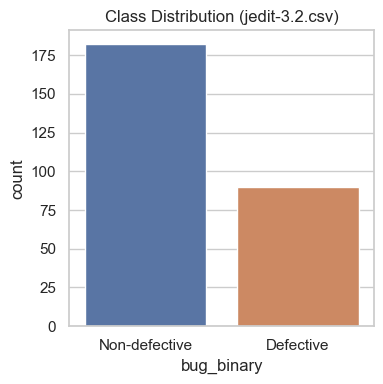

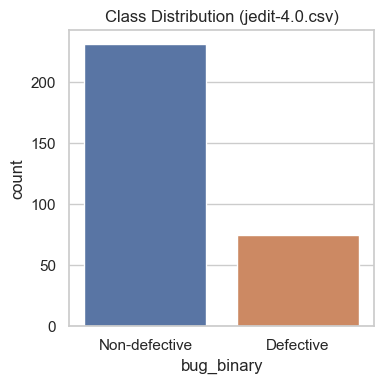

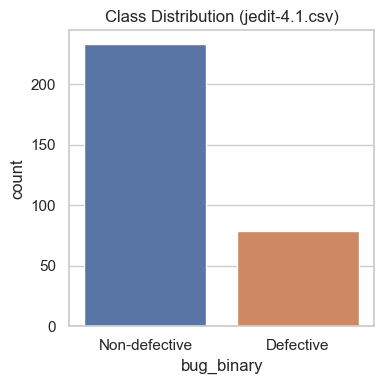

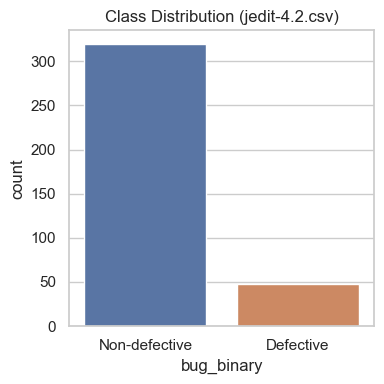

In [5]:
for name, df in datasets.items():
    plt.figure(figsize=(4, 4))
    sns.countplot(x="bug_binary", data=df)
    plt.xticks([0, 1], ["Non-defective", "Defective"])
    plt.title(f"Class Distribution ({name})")
    plt.tight_layout()
    plt.show()

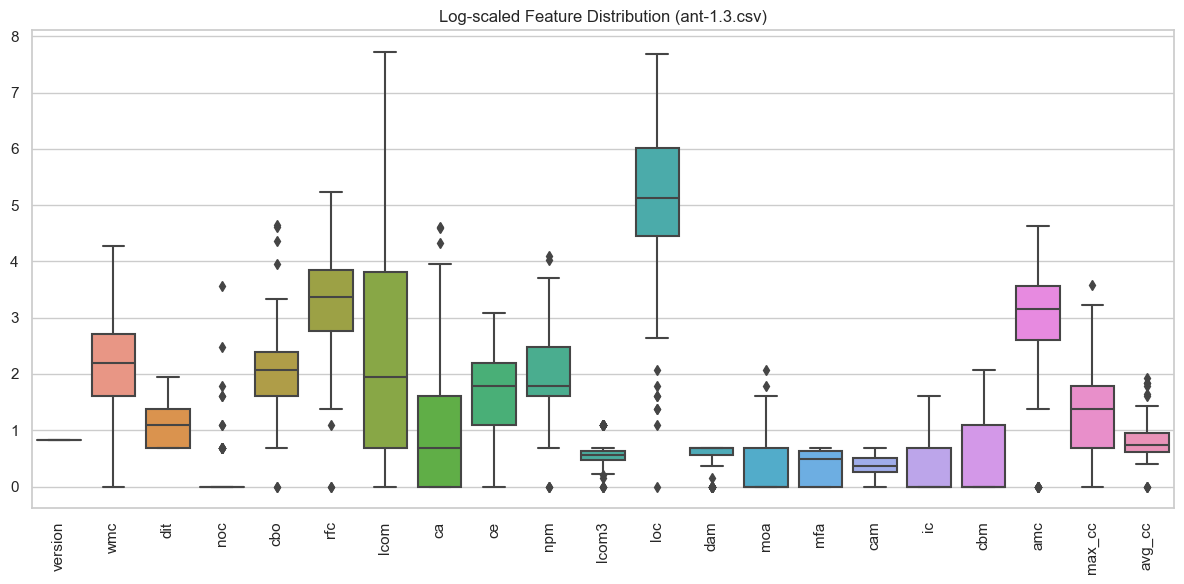

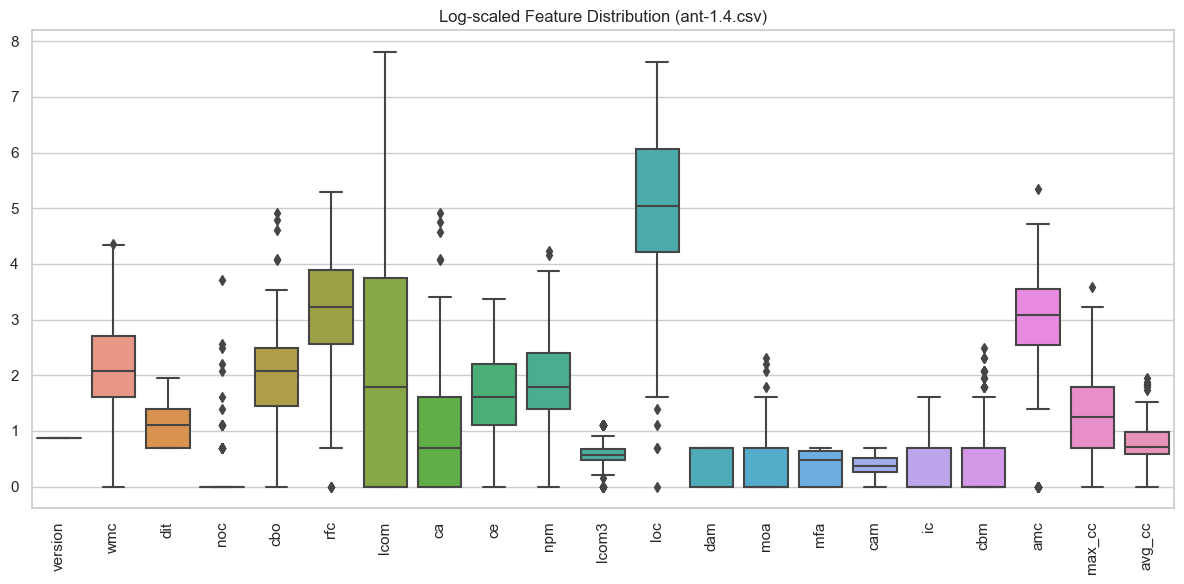

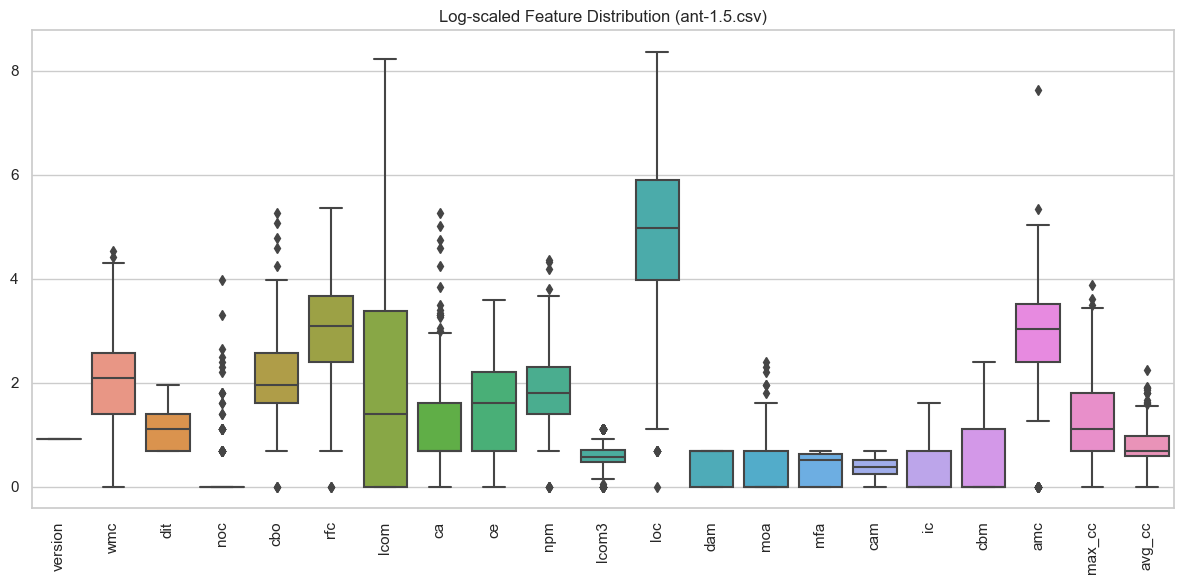

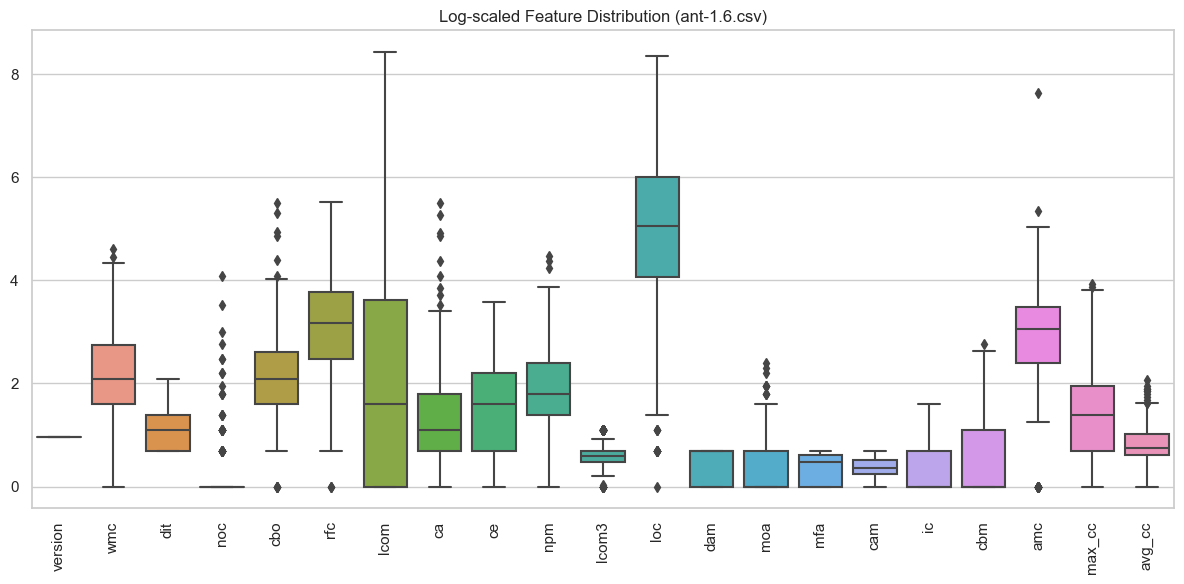

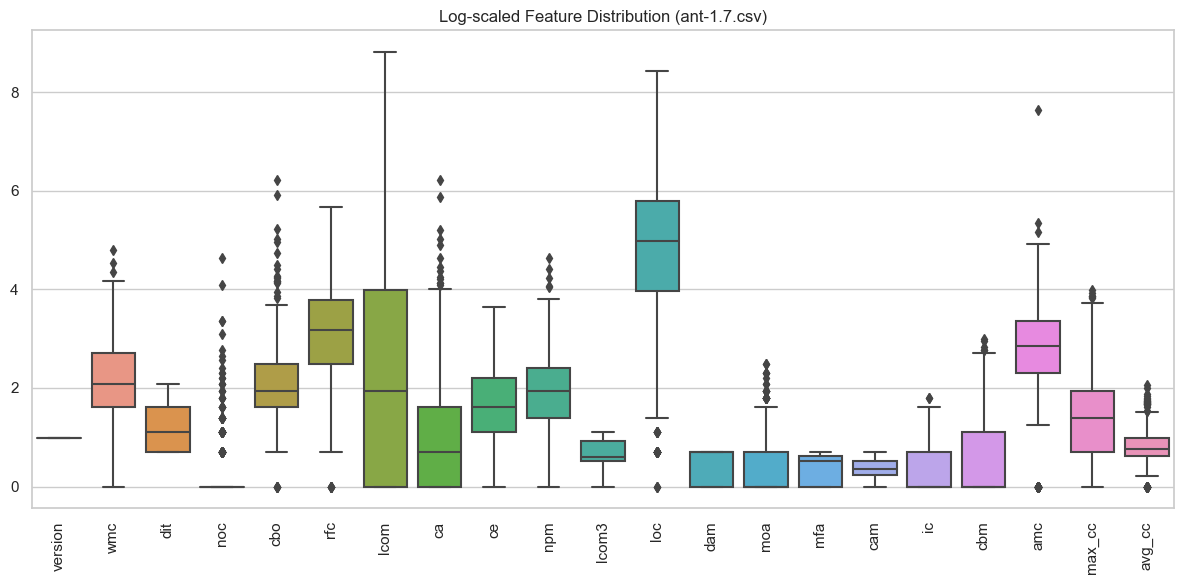

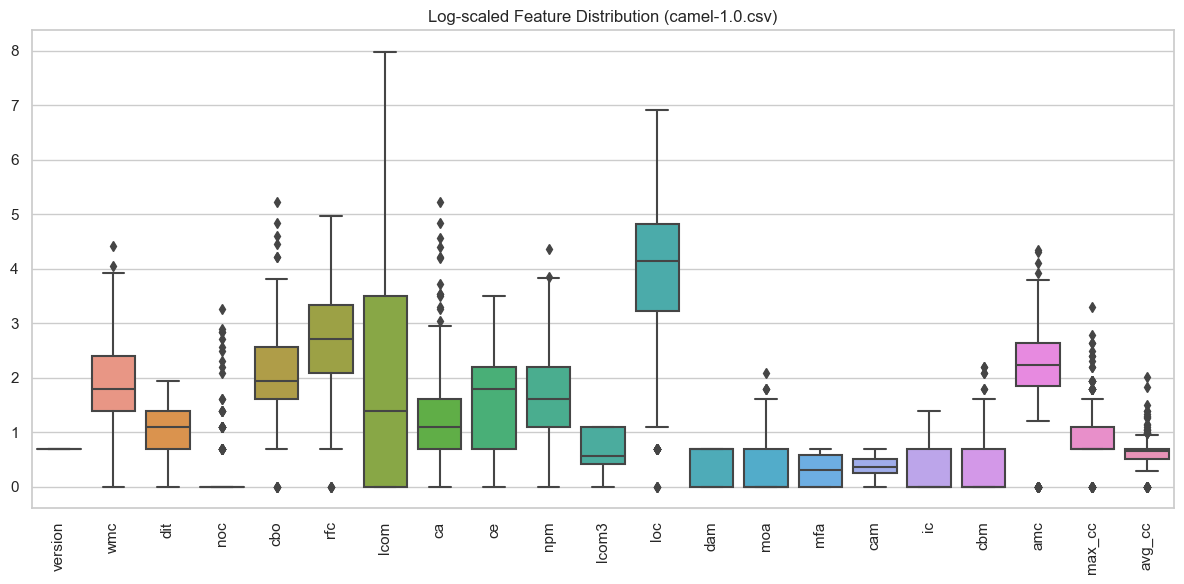

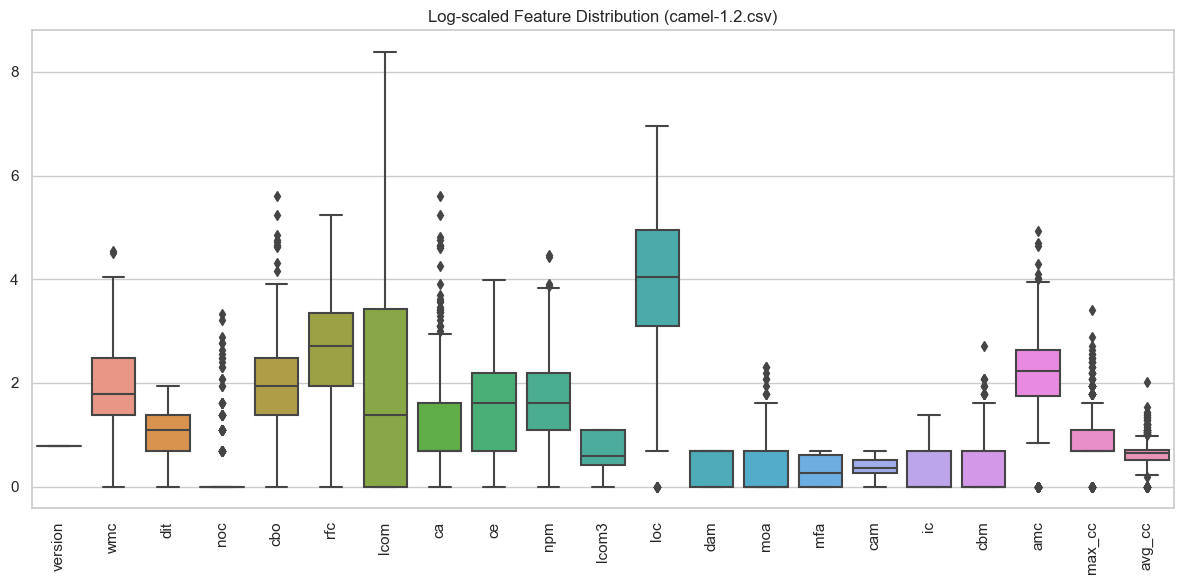

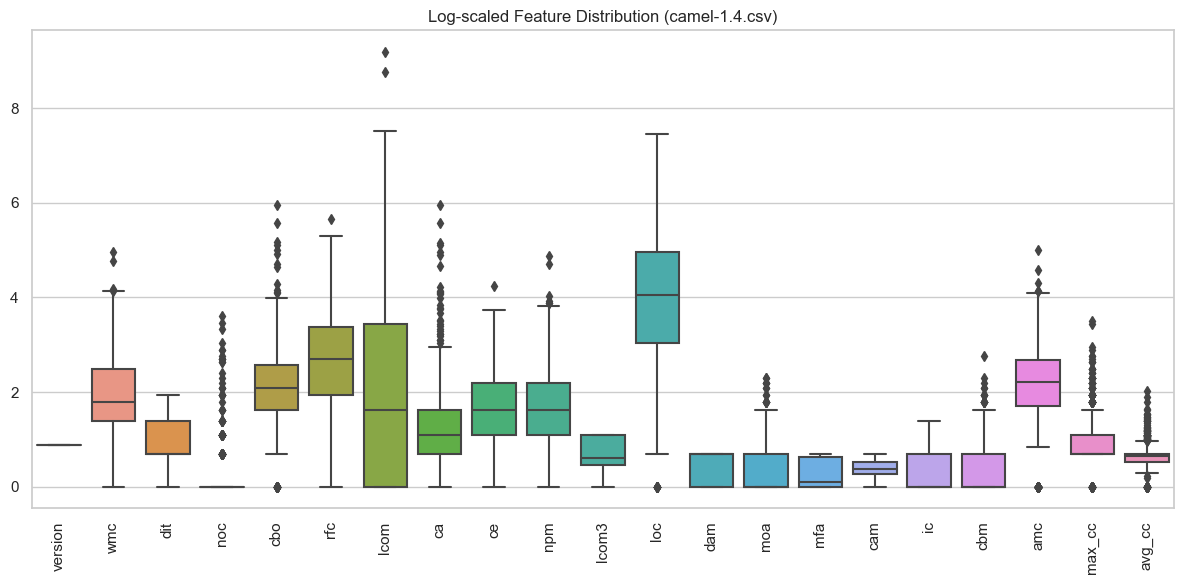

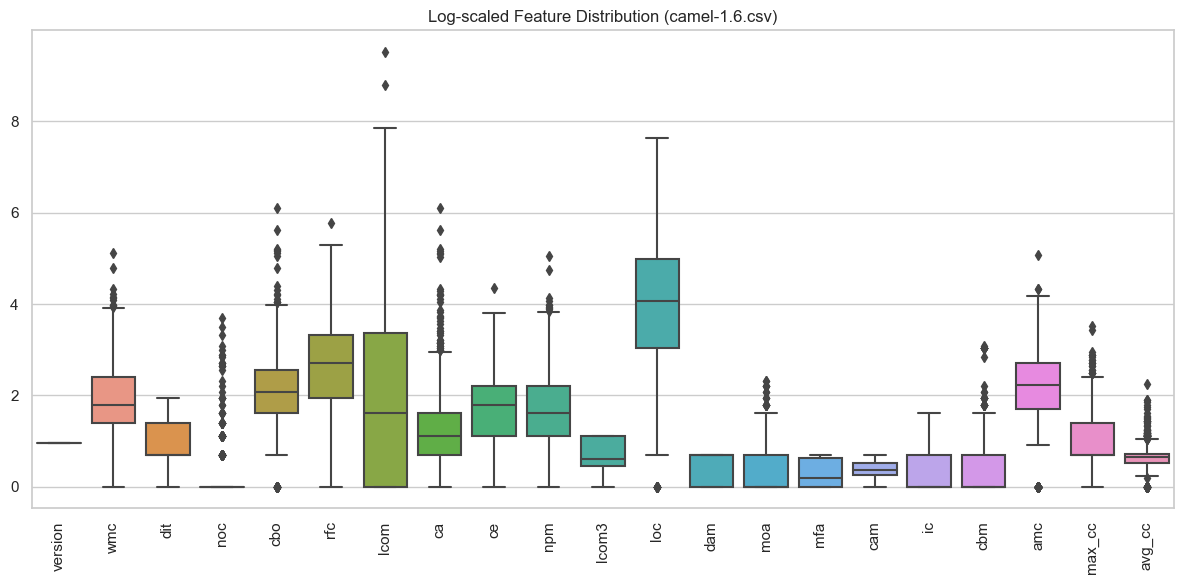

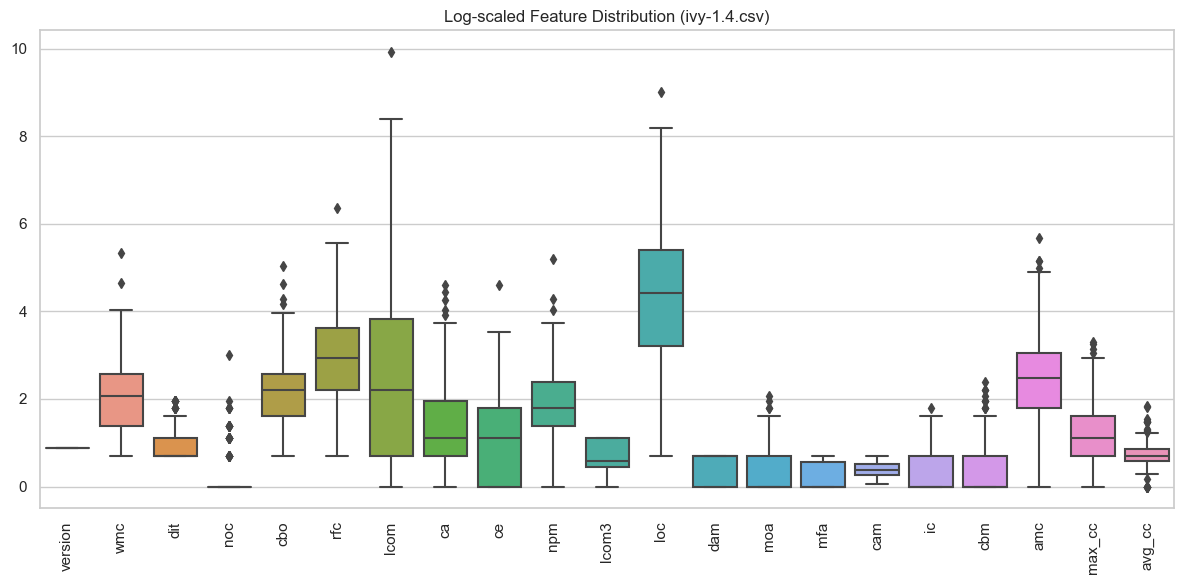

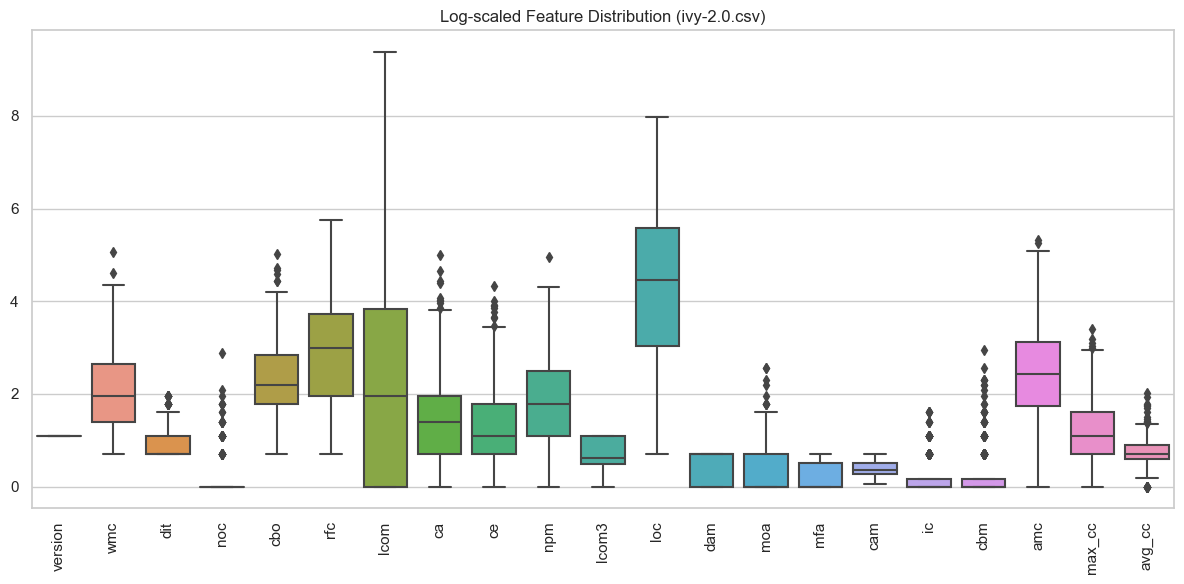

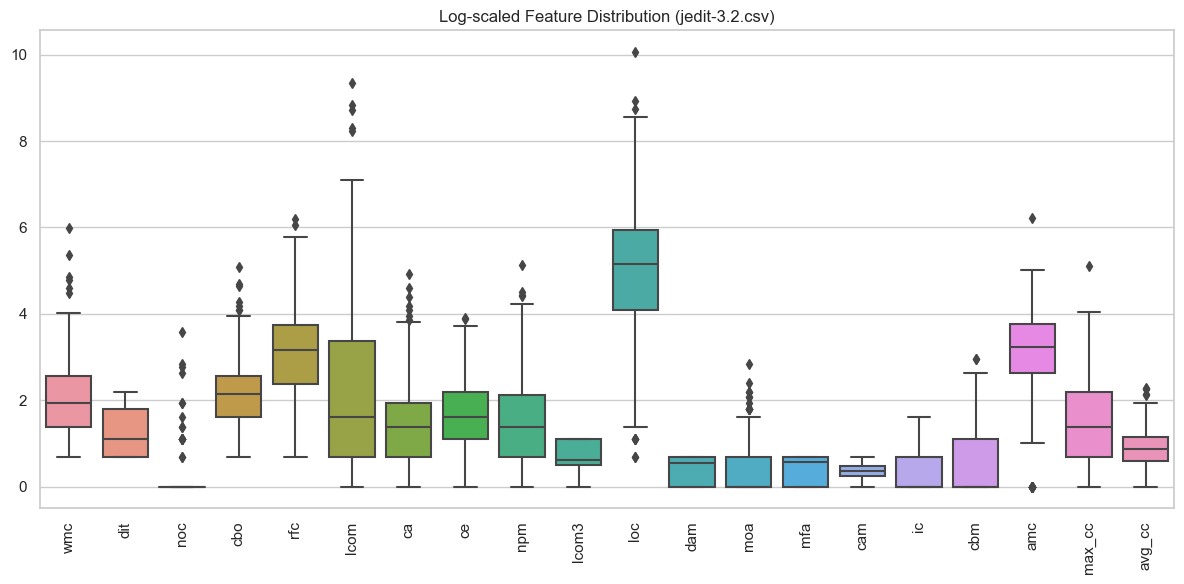

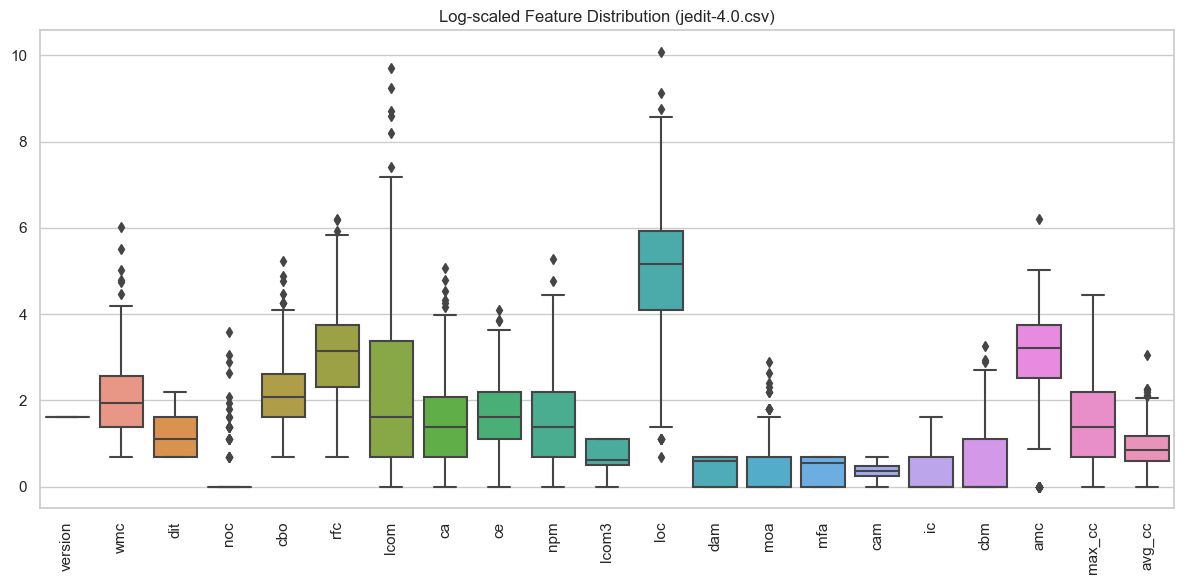

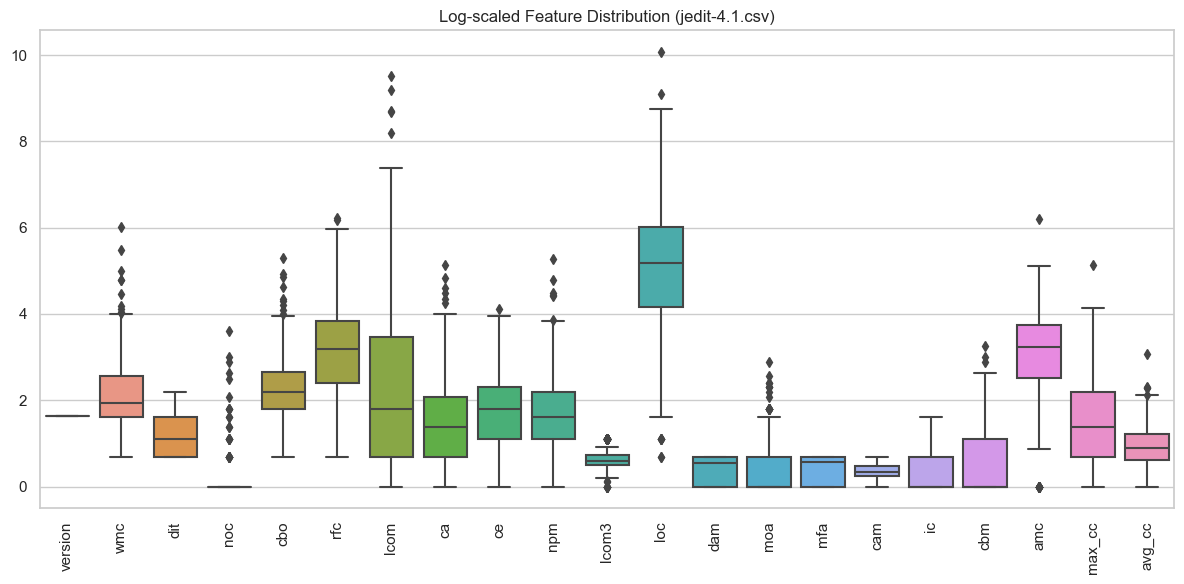

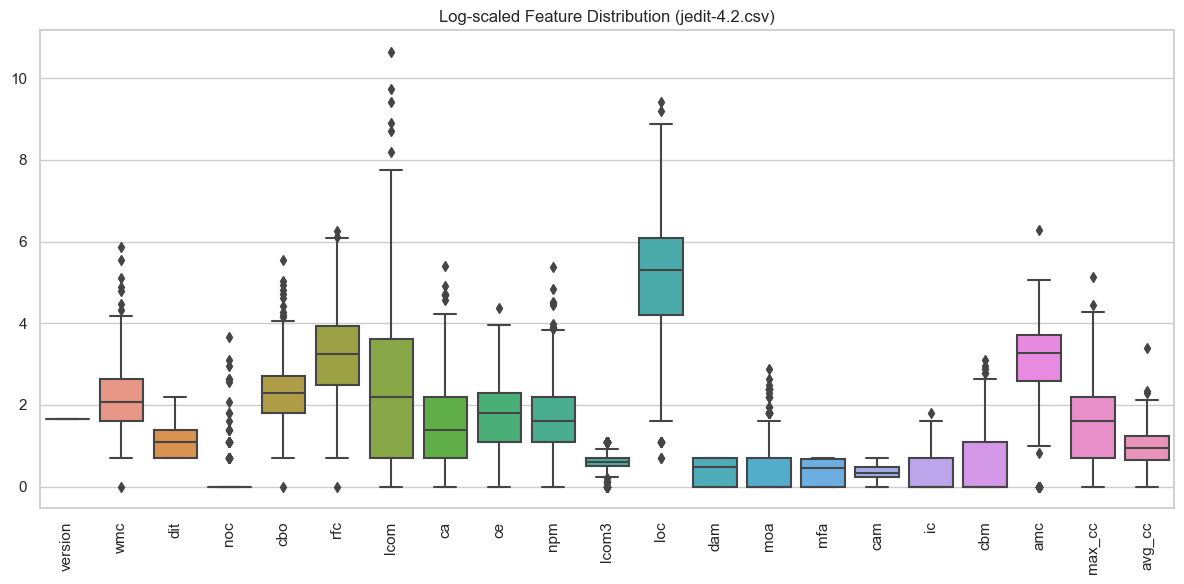

In [6]:
for name, df in datasets.items():
    features = (
        df
        .drop(columns=["bug", "bug_binary"])
        .select_dtypes(include=["number"])
    )

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=np.log1p(features))
    plt.xticks(rotation=90)
    plt.title(f"Log-scaled Feature Distribution ({name})")
    plt.tight_layout()
    plt.show()

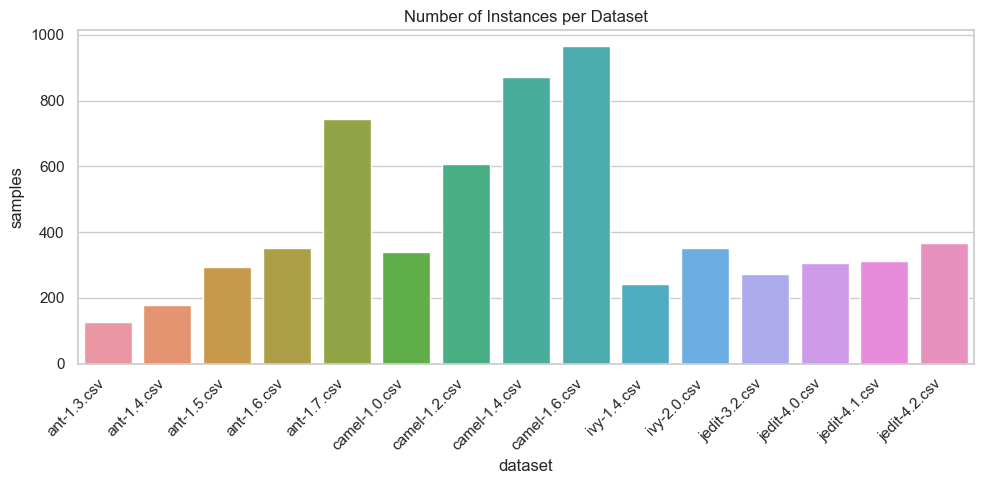

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(data=summary_df, x="dataset", y="samples")
plt.xticks(rotation=45, ha="right")
plt.title("Number of Instances per Dataset")
plt.tight_layout()
plt.show()